In [9]:
import pandas as pd
import ast
from collections import Counter
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2

In [10]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [5]:
print(type(1 / 2))

<class 'float'>


In [11]:
# 4.2 Сколько всего отелей в наборе данных
hotels['hotel_name'].nunique()

1492

In [12]:
# 4.3 Когда был оставлен самый свежий отзыв?
# Приводим столбец к формату date
hotels['review_date'] = pd.to_datetime(hotels['review_date'], errors='coerce')
hotels['review_date'] = hotels['review_date'].dt.strftime('%Y-%m-%d')

earliest_date = hotels['review_date'].min()
print(earliest_date)

# Дата самого позднего отзыва
latest_date = hotels['review_date'].max()
print(latest_date)

2015-08-04
2017-08-03


In [13]:
# 4.4 Сколько уникальных тегов представлено в наборе данных?

#Инициализируем функицию для преобразования строк в список тегов
def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []  # если не удалось распарсить, вернём пустой список

# Преобразуем строки в списки тегов
hotels["tags"] = hotels["tags"].apply(safe_eval)

# Собираем все теги
all_tags = [tag.strip() for tags in hotels["tags"] for tag in tags]

# Убираем возможные пустые строки и лишние пробелы
all_tags = [tag for tag in all_tags if tag]

# Находим уникальные
unique_tags = set(all_tags)

print(f"Количество уникальных тегов: {len(unique_tags)}")
print("Примеры тегов:", list(unique_tags)[:10])

Количество уникальных тегов: 2368
Примеры тегов: ['Family room Free Wi Fi', 'King Guestroom', 'Suite with St Stephen s Cathedral View', 'Luxury Room with Spa Access', 'Superior Double Room 3 Adults', 'Double Deluxe Suite', 'Ambassador Suite', 'Comfort Room', 'Twin Hilton Deluxe Room', 'Deluxe Double Room with Spa Bath']


In [14]:
# 4.5 Какой тег представлен в наибольшем числе отзывов?

tag_counts = Counter(all_tags)

# 5. Находим самый частый тег
most_common_tag, count = tag_counts.most_common(1)[0]

print(f"Самый часто встречающийся тег: '{most_common_tag}'")
print(f"Он встречается в {count} отзывах")

Самый часто встречающийся тег: 'Leisure trip'
Он встречается в 313593 отзывах


In [15]:
# 4.6 Из тегов выясните, на сколько ночей чаще всего останавливаются путешественники в отелях.

# Отбираем теги, где есть слово "night"
nights_tags = [tag for tag in all_tags if 'night' in tag.lower()]

# Извлекаем число ночей из каждого тега
nights = []
for tag in nights_tags:
    match = re.search(r"(\d+)\s*night", tag.lower())
    if match:
        nights.append(int(match.group(1)))
        
# Считаем сколько раз встречается каждое количество ночей
nights_count = Counter(nights)

# Находим самое популярное значение
most_common_night, count = nights_count.most_common(1)[0]
        
print(f'Чаще всего путешественники останавливаются на {most_common_night} ночей')

Чаще всего путешественники останавливаются на 1 ночей


In [16]:
hotels = hotels.drop(['review_date', 'positive_review', 'hotel_name', 'reviewer_nationality', 'negative_review', 'tags', 'days_since_review', 'hotel_address'], axis=1)

In [17]:
hotels = hotels.fillna(0)

In [18]:
hotels.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
0,581,8.4,3,1994,4,7,10.0,51.507894,-0.143671
1,299,8.3,3,1361,2,14,6.3,51.521009,-0.123097
2,32,8.9,6,406,0,14,7.5,48.845377,2.325643
3,34,7.5,0,607,11,8,10.0,48.888697,2.394540
4,914,8.5,4,7586,20,10,9.6,52.385601,4.847060


In [19]:
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', ' total_number_of_reviews_reviewer_has_given', 'additional_number_of_scoring', 'review_total_positive_word_counts']

# категориальные признаки
cat_cols = ['average_score', 'lat', 'lng']

In [20]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [21]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [22]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [24]:
print(X.columns.tolist())

['additional_number_of_scoring', 'average_score', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'lat', 'lng']


<Axes: title={'center': 'Значимость признаков (f_regression)'}>

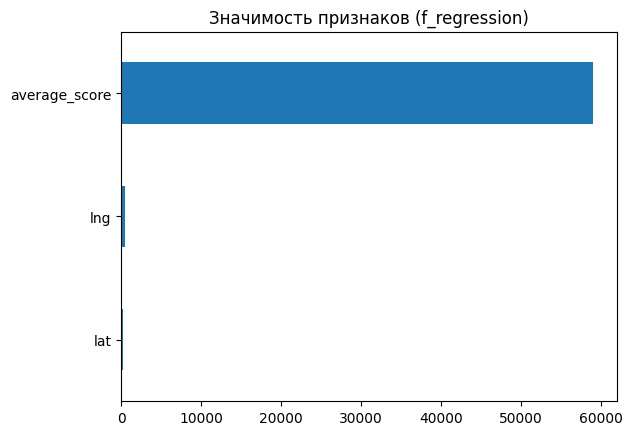

In [26]:
# --- Анализ значимости признаков при регрессии ---
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
import pandas as pd

# Категориальные (числовые) признаки
cat_cols = ['average_score', 'lat', 'lng']

# Разделяем признаки и целевую переменную
X = hotels.drop(['reviewer_score'], axis=1)
y = hotels['reviewer_score']

# Масштабируем признаки в диапазон [0, 1] (не обязательно, но полезно)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[cat_cols]), columns=cat_cols)

# Вычисляем важность признаков через f_regression
imp_cat = pd.Series(f_regression(X_scaled, y)[0], index=cat_cols)

# Сортируем и строим график
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh', title='Значимость признаков (f_regression)')

In [27]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1414459354214589


Небольшой бонус:


In [ ]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберем их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)

In [ ]:
hotels['additional_number_of_scoring'].nunique()

480